# Problem 1

## Barabasi-Albert model with constant linear term in the attachment probability

We consider the Barabasi-Albert preferential attachment model with a slight difference in the probability of attachment for a new node coming at time $t$ to node $v$: it will be proportional to 

$$ \frac{d_v + C}{(t-1)(2L + C)} $$

where $ C \geq -L $ and $L$ is the fixed number of edges that a node has when it arrives: for $C = 0$ we are back in the usual setting. This adjustment allows us to model more expressively real networks, since in the end we should find a functional form for the degree distribution proportional to $k ^{-(3+\frac{C}{L})}$.

To show this, we proceed like we did in the vanilla Barabasi-Albert model, approximating the probability for a node of degree $k$ to increase its degree by one at time $t$ with 

$$ \frac{L(k+C)}{t(2L + C)} $$

the underlying assumption in this approximation is that it is unlikely for a node to get more than one edge, which is true with high probability in regime. 

Given this we can compute the number of nodes whose degree is $k$ as we did in the rate equation approach we used to determine the degree distribution of Barabasi-Albert model. 

So we have: 

$$
n_k(t +1) = \begin{cases}
    0 & \text{if } & k < L \\ 
    n_k(t)[1-\frac{L(k+C)}{t(2L+C)}] + 1 & \text{if} & k = L \\
    n_k(t)[1-\frac{L(k+C)}{t(2L+C)}] + n_{k-1}(t)\frac{L(k-1+C)}{t(2L+C)}& \text{if} & k > L
\end{cases}
$$

Some comments on this: 
+ There are no node whose degree is less than $L$ by design;
+ The approximate probability of increasing the degree by one gives us on average the proportion of nodes that increases their degree in the subsequent timestamp;
+ This means that the population of nodes $n_k(t)$ is decreased proportionally to $\frac{L(k+C)}{t(2L + C)}$, because it is the ratio of nodes whose degree becomes $k+1$, but also increased proportionally to $\frac{L(k-1+C)}{t(2L + C)}$, being the ratio of nodes whose degree jumps from $k-1$ to $k$.

In terms of probabilities $p_k(t) = \frac{n_k(t)}{t}$ we can rewrite the previous as: 

$$
(t+1)p_k(t+1) = \begin{cases}
    0 & \text{if } & k < L \\ 
    tp_k(t)[1-\frac{L(k+C)}{t(2L+C)}] + 1 & \text{if} & k = L \\
    tp_k(t)[1-\frac{L(k+C)}{t(2L+C)}] + tp_{k-1}(t)\frac{L(k-1+C)}{t(2L+C)}& \text{if} & k > L
\end{cases}
$$

We are looking for stationary distributions, so we drop the time dependencies. 

For $k > L$ we have:

$$ \cancel{tp_k} + p_k = \cancel{tp_k}  - \cancel{t}p_k\frac{L(k+C)}{\cancel{t}(2L+C)} + \cancel{t}p_{k-1}\frac{L(k-1+C)}{\cancel{t}(2L+C)} $$
$$ p_k[1 + \frac{L(k+C)}{2L+C}] = p_{k-1}\frac{L(k-1+C)}{2L+C} $$
$$ p_k\frac{2L + C + Lk+ LC}{\cancel{2L+C}} = p_{k-1}\frac{Lk-L+LC}{\cancel{2L+C}} $$
$$ p_k = p_{k-1}\frac{Lk-L+LC}{2L + C + Lk+ LC} $$
$$ p_k = p_{k-1}\frac{\cancel{L}(k-1+C)}{\cancel{L}(2 + \frac{C}{L} + k+ C)} $$

with a change of variable:

$$ p_{k+1} = p_k\frac{k+C}{k + 3 + C + \frac{C}{L}} $$

For $k = L$ we have:
$$ \cancel{tp_k} + p_k = \cancel{tp_k}  - \cancel{t}p_k\frac{L(k+C)}{\cancel{t}(2L+C)} + 1 $$
$$ p_k[1 + \frac{L(k+C)}{2L+C}] = 1 $$
$$ p_k\frac{2L + C + Lk+ LC}{2L+C} = 1 $$
$$ p_k = \frac{2L + C + Lk+ LC}{2L+C} $$ 

substituting $k = L$:

$$ p_L = \frac{2L+C}{2L + C + L^2+ LC} = \frac{\cancel{L}(2+\frac{C}{L})}{\cancel{L}(2 + \frac{C}{L} + L+ C)}$$ 


Now we have the following: 
$$
\begin{cases}
    p(L) = \frac{2+\frac{C}{L}}{2 + \frac{C}{L} + L+ C} \\ 
    p(k+1) = p(k)\frac{k+C}{k + 3 + C + \frac{C}{L}} 
\end{cases}
$$

In this case is way harder to derive recursively a closed form, so we try through a continuous approximation. 
Let's manipulate the finite difference equation, to see which ODE it approximates:

$$ p(k+1) = p(k)\frac{k+C}{k + 3 + C + \frac{C}{L}} $$
$$ (k + 3 + C + \frac{C}{L})p(k+1) = (k+C)p(k) $$
$$ (k + C)p(k+1) + (3 + \frac{C}{L})p(k+1) = (k+C)p(k) $$
$$ (k + C)[p(k+1) - p(k)] = - (3 + \frac{C}{L})p(k+1) $$
$$ (k - 1 + C)[p(k) - p(k-1)] = - (3 + \frac{C}{L})p(k) $$
$$ (k - 1 + C)\frac{\partial p(k)}{\partial k} \approx - (3 + \frac{C}{L})p(k) $$

Now let's properly separate the variables and then integrate with respect to the countour condition:

$$ \frac{\partial p(k)}{p(k)} = - (3 + \frac{C}{L})\frac{\partial k}{k -1 + C} $$
$$ \int_{p(L)}^{p(k)} \frac{\partial p(u)}{p(u)} = - \int_{L}^{k}(3 + \frac{C}{L})\frac{\partial v}{v -1 + C} $$
$$ \log{p(k)} - \log{p(L)} = -(3 + \frac{C}{L}) \log{\frac{k-1+C}{L-1+C}} $$
$$ \log{p(k)} = \log{p(L)} + \log[{(\frac{k-1+C}{L-1+C})^{-(3 + \frac{C}{L})}}] $$
$$ \log{p(k)} = \log[p(L){(\frac{k-1+C}{L-1+C})^{-(3 + \frac{C}{L})}}] $$

Finally:

$$ p(k) = p(L){(\frac{k-1+C}{L-1+C})^{-(3 + \frac{C}{L})}} $$

where we can see that $p(k) \propto k^{-(3+\frac{C}{L})}$.


Let's run a simulation to look at the behaviour of this model.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# Number of nodes entering the process

M = int(2e5)

# Constants

L = 3
C = 7

# Initialization - We'll just need a numpy array to store and update the degree of the nodes as the process goes on 

degrees = np.array([0 for v in range(M+2)])
degrees[0] = L
degrees[1] = L

# Main loop to populate the graph

for v in tqdm(range(2,M+2)):

    probs = np.array((degrees[:v]) + C) / ((v * (2*L + C)))
    probs /= np.sum(probs)

    u = np.random.choice(np.array(range(v)), size = L, replace = True, p = probs)

    degrees[u] += 1
    degrees[v] += L

100%|██████████| 200000/200000 [23:48<00:00, 140.04it/s]


In [3]:
unique_degrees = np.unique(degrees)
degree_distribution = [np.sum(degrees == d) for d in unique_degrees]
degree_distribution /= np.sum(degree_distribution)

In [20]:
# Our retrieved distribution

def proxy_power_law(L, C, x):
    p_L = (2 + C/L) / (2 + C/L + L + C)
    return p_L*((x-1+C)/(L-1+C))**(-(3 + C/L))

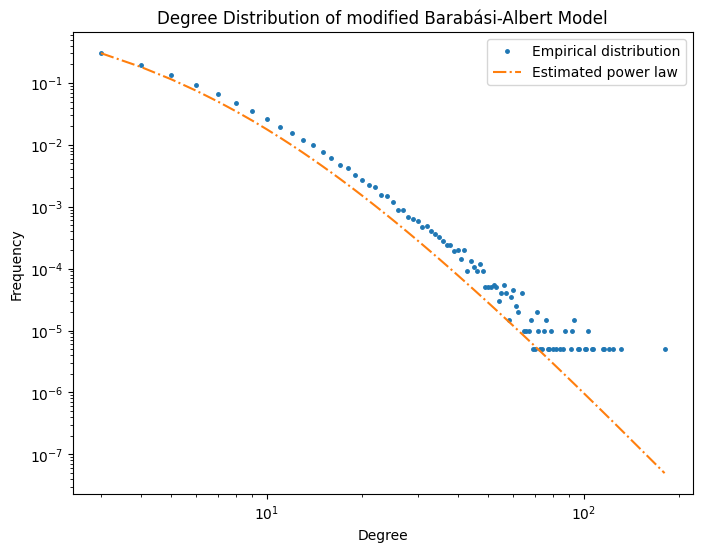

In [22]:
plt.figure(figsize=(8, 6))
plt.loglog(unique_degrees, degree_distribution, 'o', markersize=2.5, label='Empirical distribution')
plt.loglog(unique_degrees, proxy_power_law(L,C,unique_degrees), '-.', label=f'Estimated power law')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of modified Barabási-Albert Model')
plt.legend()
plt.show()

The differences in the value for $\gamma$ in a power-law functional form implies different behaviours of the dynamics of the phenomenon: in particular the vanilla BA model sets gamma to be at the so called *critical point* ($\gamma = 3$), since above this value for $\gamma$ the power-law distribution doesn't have anymore diverging second moment (the so called *Scale-free property*). 

This variation in the model allows us to model *ultra small world* ($2 < \gamma < 3$) as well as classic *small world* regimes ($\gamma > 3$): we can see that in this last case a curvature strikes back in the log-log degree distribution, and for higher values we again have good Poisson approximation as in classic random ER graph model. 

The bound $C \geq - L$ ensures that the model doesn't degenerate in an *anomalous regime* where also the first moment diverge: no large network can exist under such a dynamic.

__________________